In [ ]:
%load_ext autoreload
%autoreload 2

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

import shared as sh

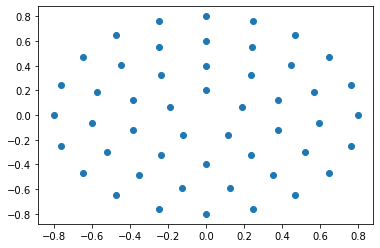

In [ ]:
# Construct nodes in unit circle
density = 25
inner = []
for r in np.linspace(0, 1, 5, endpoint=False):
    t = np.linspace(0, 2 * np.pi, int(density * r), endpoint=False)
    inner.extend(r * np.stack([np.sin(t), np.cos(t)], axis=1))
inner = np.array(inner)
plt.scatter(*inner.T)

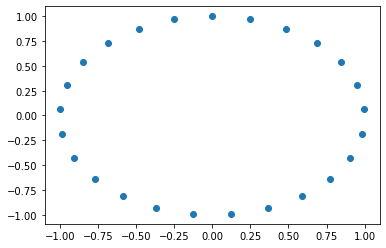

In [ ]:
# Construct nodes on the boundary
t = np.linspace(0, 2 * np.pi, density, endpoint=False)
boundary = np.stack([np.sin(t), np.cos(t)], axis=1)
plt.scatter(*boundary.T)

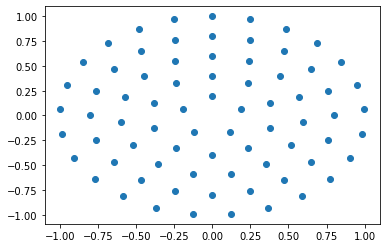

In [ ]:
all_nodes = np.concatenate([inner, boundary])
# Same as: plt.scatter(all_nodes.T[0], all_nodes.T[1])
plt.scatter(*all_nodes.T)

In [ ]:
# Construct target nodes on a regular grid
grid = np.mgrid[-1:1:100j, -1:1:100j]
gridshape = grid[0].shape
grid_nodes = sh.grid_to_nodes(grid)

In [ ]:
grid.shape

(2, 100, 100)

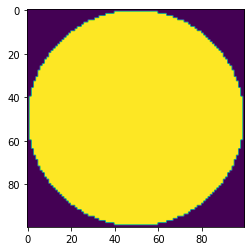

In [ ]:
# Boolean mask of points inside the domain
inside_mask = (np.linalg.norm(grid, axis=0) <= 1)
plt.imshow(inside_mask)

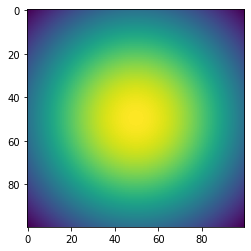

In [ ]:
# Construct RBF
rbf = sh.GaussianRBF(scale=1)
# Plot RBF centered at 0, for visual intuition for scale parameter
plt.imshow(rbf(grid_nodes, np.array([[0, 0]])).reshape(gridshape))

In [ ]:
# Example exact solution and exact laplacian
def exact(x):
    # return np.ones(x.shape[0])
    return np.sin(2*np.pi*x[:, 0]) * np.cos(2*np.pi*x[:, 1])
def exact_laplace(x):
    # return np.zeros(x.shape[0])
    return -8 * np.pi**2 * exact(x)

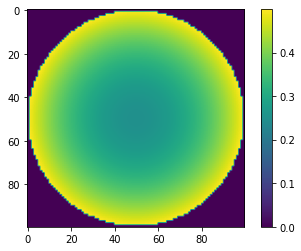

In [ ]:
# Construct Poisson equation and solve
matrix = np.concatenate([
    sh.laplace(rbf, inner, all_nodes),
    rbf(boundary, all_nodes)
])
rhs = np.concatenate([
    exact_laplace(inner),
    exact(boundary)
])
coeffs = np.linalg.solve(matrix, rhs)
solution = (rbf(grid_nodes, all_nodes) @ coeffs).reshape(gridshape)
solution[~inside_mask] = 0
plt.imshow(solution)
plt.colorbar()

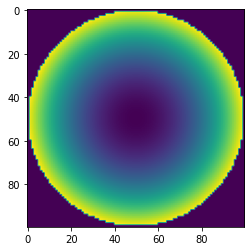

In [ ]:
# Plot exact solution
exact_solution = exact(grid_nodes).reshape(gridshape)
exact_solution[~inside_mask] = 0
plt.imshow(exact_solution)

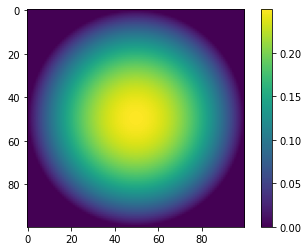

In [ ]:
# Plot error
plt.imshow(np.abs(solution - exact_solution))
plt.colorbar()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=2267d031-44a8-4972-8e76-035c61ceeb76' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>